# Análisis de datos - Titanic

### Descripción: 
Para facilitar el analísis estadístico de lo acontecido en el Titanic, se realizó este programa, que permite seleccionar, de una lista, un gráfico a generar en función de las variables existentes y pertinentes a dicho tipo de gráfico.

---

### Librerías  

In [1]:
#IMPORTAMOS LAS LIBRERIAS A UTILIZAR
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

### Preparación del DataFrame 
En esta sección, se realizará la lectura del archivo Titanic.csv y se almacenará en un DataFrame. Posteriormente, se eliminarán las columnas que no serán utilizadas en el análisis, se ordenarán y se les asignarán nombres más claros para obtener resultados más comprensibles en el análisis.

In [2]:
# Se abre el archivo.
data_frame_titanic = pd.read_csv('Titanic.csv', encoding='UTF-8')

# Se eliminan las columnas "PassengerId", "Ticket" y "Cabin" porque no se utilizarán.
data_frame_titanic = data_frame_titanic.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

# Se reordenan las columnas
nuevo_orden = ['Name', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data_frame_titanic = data_frame_titanic[nuevo_orden]

# Se reemplazan los valores de la columna "Sex" por "femenino" y "masculino". Idem con la columna "Supervivencia" por "Sí" y "No".
data_frame_titanic['Sex'] = data_frame_titanic['Sex'].replace({'female': 'femenino', 'male': 'masculino'})
data_frame_titanic['Survived'] = data_frame_titanic['Survived'].replace({1: 'Sí', 0: 'No'})

# Se renombran las columnas en español.
columnas_en_espanol = {
    'Name': 'Nombre',
    'Survived': 'Supervivencia',
    'Pclass': 'Clase',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'N_hermanos_cónyuge',
    'Parch': 'N_padres_hijos',
    'Fare': 'Tarifa',
    'Embarked': 'Embarque'
}
data_frame_titanic = data_frame_titanic.rename(columns=columnas_en_espanol)

# Visualización del DataFrame limpio.
print('PREVISUALIZACIÓN DEL DATA:\n')
print(data_frame_titanic.head(5))

PREVISUALIZACIÓN DEL DATA:

                                              Nombre Supervivencia  Clase  \
0                            Braund, Mr. Owen Harris            No      3   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...            Sí      1   
2                             Heikkinen, Miss. Laina            Sí      3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)            Sí      1   
4                           Allen, Mr. William Henry            No      3   

        Sexo  Edad  N_hermanos_cónyuge  N_padres_hijos   Tarifa Embarque  
0  masculino  22.0                   1               0   7.2500        S  
1   femenino  38.0                   1               0  71.2833        C  
2   femenino  26.0                   0               0   7.9250        S  
3   femenino  35.0                   1               0  53.1000        S  
4  masculino  35.0                   0               0   8.0500        S  


### Funciones 
En esta sección se proporcionan las funciones necesarias para realizar los gráficos con el DataFrame. 

##### 1. Funciones con mathplot.lib

In [58]:
# Validación de las opciones del menú generador de gráficos
def retornar_opcion(opcion, opciones_disponibles):
    if opcion in opciones_disponibles.keys(): 
        return opciones_disponibles[opcion]
    raise ValueError (f" No se encontró la opción {opcion}, intente con un valor válido, tales como: {opciones_disponibles.keys()})")

def retornar_opcion_multiple(opciones, opciones_disponibles):
    for opcion in opciones:
        if opcion not in opciones_disponibles:
            raise ValueError(f"La opción {opcion} no es válida. Las opciones válidas son: {', '.join(opciones_disponibles.keys())}")

# Gráficos
def crear_grafico_frecuencia(data_frame_titanic, opcion_elegida):
    try:
        # Validación de la opción elegida
        opciones_frecuencia = {1: "Edad",2:"N_hermanos_cónyuge",3:"N_padres_hijos"}
        categoria = retornar_opcion(opcion_elegida, opciones_frecuencia)
        
        #Graficar
        plt.hist(data_frame_titanic[categoria].dropna(), bins=20, color='skyblue')
        plt.xlabel(categoria)
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {categoria} de los Pasajeros")
        plt.show()    
    # Manejo de errores
    except Exception as e:
        print(f"Error:{e}")
        
def crear_grafico_torta(data_frame_titanic, opcion_elegida):
    try: 
        # Validación de la opción elegida
        opciones_torta = {1: "Supervivencia",2:"Clase",3:"Sexo",4:"Embarque"}
        categoria = retornar_opcion(opcion_elegida, opciones_torta)

        #Graficar
        cantidad_categoria = data_frame_titanic[categoria].value_counts()
        plt.pie(cantidad_categoria, labels=cantidad_categoria.index, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title(f"Distribución de {categoria} de los Pasajeros")
        plt.show()
    # Manejo de errores
    except Exception as e:
        print(f"Error:{e}")
        
def crear_grafico_promedio(data_frame_titanic, opcion_elegida):
    try:
        # Validación de la opción elegida
        opciones_promedio = {1:"Clase",2:"Sexo",3:"Embarque"}
        categoria = retornar_opcion(opcion_elegida, opciones_promedio)

        #Graficar
        promedio_r1_r2 = data_frame_titanic.groupby(categoria)['Tarifa'].mean()
        promedio_r1_r2.plot(kind='bar')
        plt.xlabel(categoria)
        plt.ylabel('Tarifa')
        plt.title(f"Promedio de Tarifa por {categoria}")
        plt.show()        
    # Manejo de errores
    except Exception as e:
        print(f"Error:{e}")

def crear_grafico_diferencia(data_frame_titanic ,opcion_elegida_1, opcion_elegida_2):
    opciones_diferencia_1 = {1: "Clase", 2:"Embarque"}
    opciones_diferencia_2 = {1: "Supervivencia", 2:"Sexo"}
    
    categoria_1 = retornar_opcion(opcion_elegida_1, opciones_diferencia_1)
    categoria_2 = retornar_opcion(opcion_elegida_2, opciones_diferencia_2)
    
    #Graficar
    #La categoria a diferenciar es "categoria_2"
    survival_by_class = data_frame_titanic.groupby(categoria_1)[categoria_2].value_counts().unstack()
    survival_by_class.plot(kind='bar', stacked=True)
    plt.xlabel(categoria_1)
    plt.ylabel('Cantidad')
    plt.title(f"{categoria_2} por {categoria_1}")

    # Personalización de la leyenda utilizando los valores de las columnas
    unique_values_1 = data_frame_titanic[categoria_2].unique()
    unique_values_2 = data_frame_titanic[categoria_1].unique()
    plt.legend(title=categoria_2, labels=unique_values_1)
    
    plt.show()    

##### 2. Funciones con NetWorkX
Estas funciones están diseñadas para trabajar con grafos en NetworkX y se basan en la búsqueda por apellido de cada miembro de la tripulación del Titanic. Estas funciones identifican a todos los pasajeros con un apellido específico y los vinculan con una de las tres variables proporcionadas: Sexo, Clase o Supervivencia. 

In [59]:
def validar_busqueda(apellido,data_a_validar):
    #Si está vacío, arrojará un excepción. 
    if data_a_validar.empty:
        raise ValueError(f"No se encontraron registros para el apellido {apellido} proporcionado")

# def generar_grafo_por_categoria(apellido, data, opcion_elegida):
#     try:
        
#         # Expresiones regulares para obtener el apellido de las columna Nombre.
#         apellido = "^" + re.escape(apellido.capitalize()) + ".*"
        
#         # Filtrar el DataFrame para incluir solo las filas que coinciden con el nombre dado
#         data_filtrada = data[data['Nombre'].str.match(apellido)]

#         # Validar la busqueda
#         validar_busqueda(apellido,data_filtrada)
        
#         #validar_opcion. Retorna la categoria a buscar.(unpacking)
#         opciones_disponibles = {1:["Sexo",["masculino", "femenino"]],
#                                 2:["Clase",[1, 2, 3]],
#                                 3:["Supervivencia",["Sí", "No"]]}
#         categoria, valores_categoria = retornar_opcion(opcion_elegida, opciones_disponibles)
        
#         # Crear un grafo dirigido
#         DG = nx.DiGraph()
        
#         # Agregar nodos y bordes al grafo
#         for i in range(0, len(data_filtrada)):
#             DG.add_edge(data_filtrada.iloc[i]['Nombre'], data_filtrada.iloc[i][categoria])
        
#         # Definir colores para los nodos
#         color_nodos = ['red' if node in valores_categoria else 'lightblue' for node in DG.nodes()]
        
#         # Dibujar grafo
#         fig, ax = plt.subplots(figsize = (20,20))
        
#         nx.draw(DG, with_labels=True, node_size = 1500,node_color= color_nodos)
#         plt.show()
    
#     except Exception as e:
#         print(f"Error:{e}")

def generar_grafo_por_multifuncion(apellido, data, opciones_elegidas):
    try:
        # Expresiones regulares para obtener el apellido de la columna Nombre.
        apellido = "^" + re.escape(apellido.capitalize()) + ".*"

        # Filtrar el DataFrame para incluir solo las filas que coinciden con el nombre dado
        data_filtrada = data[data['Nombre'].str.match(apellido)]

        # Validación de la búsqueda
        validar_busqueda(apellido, data_filtrada)

        # Validación de opciones elegidas
        opciones_disponibles = {
            "1": "Sexo",
            "2": "Clase",
            "3": "Supervivencia"
        }
        
        retornar_opcion_multiple(opciones_elegidas, opciones_disponibles)

        # Crear un grafo dirigido
        DG = nx.DiGraph()

        # Agregar nodos, bordes y leyendas al grafo
        for i in range(0, len(data_filtrada)):
            if re.search("1", opciones_elegidas):
                DG.add_edge(data_filtrada.iloc[i]['Nombre'], data_filtrada.iloc[i]['Sexo'])
            if re.search("2", opciones_elegidas): 
                DG.add_edge(data_filtrada.iloc[i]['Nombre'], data_filtrada.iloc[i]['Clase'])
            if re.search("3", opciones_elegidas):  
                DG.add_edge(data_filtrada.iloc[i]['Nombre'], data_filtrada.iloc[i]['Supervivencia'])
            i = i + 1 
        d = dict(DG.degree)
        clase = [1, 2, 3]
        genero = ["masculino", "femenino"]
        supervivencia = ["Sí", "No"]

        # Dibujar grafo
        fig, ax = plt.subplots(figsize =(12,12))    
        pos = nx.spring_layout(DG, k=3, scale=2.0)
        nx.draw(DG,pos, with_labels=True, node_color= ['red' if node in supervivencia else 'green' if node in clase else 'yellow' if node in genero else 'lightblue' for node in DG.nodes()])
        plt.show()

    except Exception as e:
        print(f"Error:{e}")

def generar_grafos_por_nombre(data, opcion_elegida):
    
    #Se valida y retorna opciones.
    opciones_disponibles = {1: ["masculino","Nombres Hombres"],
                            2: ["femenino", "Nombres Mujeres"]}
    sexo, nombre_nodo_principal = retornar_opcion(opcion_elegida, opciones_disponibles)
    
    #TODO: AGREGAR OTRA FUNCIÓN DONDE RETORNE EL DATAFRAME CON HOMBRES Y MUJERES. 
    #Expresión regular para buscar solamente el primer nombre de la columna Nombres del DataFrame. 
    expresion_regular = r',\s[^\s]+ (\w+)'
    
    # Filtrar los nombres de hombres utilizando la expresión regular y la columna "Sex"
    nombres_extraidos = data[data['Sexo'] == sexo]['Nombre'].str.extract(expresion_regular, expand=False)
    
    #Se cuenta la cantidad de nombres repetidos y se renombran las columnas.
    cantidad_nombres_repetidos = pd.DataFrame(nombres_extraidos.value_counts())
    cantidad_nombres_repetidos = cantidad_nombres_repetidos.reset_index()
    cantidad_nombres_repetidos.columns = ['Nombre', 'Cantidad']
    
    # Crear un gráfico dirigido utilizando NetworkX
    G = nx.DiGraph()

    # Agregar el nodo central
    G.add_node(nombre_nodo_principal)

    # Agregar los nodos de nombres y las aristas
    for _, row in cantidad_nombres_repetidos[cantidad_nombres_repetidos["Cantidad"]>=2].iterrows():
        nombre = row['Nombre']
        cantidad = row['Cantidad']
        G.add_node(nombre)
        #Relacion entre el nodo principal, los nodos hijos y el peso de cada nodo hijo, que es la cantidad de repetidos.
        G.add_edge(nombre_nodo_principal, nombre, weight=cantidad)

    # Crear un diccionario de tamaños de nodos
    node_sizes = {node: 20000 if node == nombre_nodo_principal else 1500 for node in G.nodes()}

    # Dibujar grafo
    fig, ax = plt.subplots(figsize = (20,20))
    pos = nx.spring_layout(G, seed=42)  # Posición de los nodos para una mejor visualización
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=[node_sizes[node] for node in G.nodes()], 
            node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Gráfico de Grafos de Nombres y Frecuencias")
    plt.show()


### Menú para el usuario


In [62]:
class Menu:
    def __init__(self):
        self.acceso_menu = True

    def mostrar_menu(self):
        while self.acceso_menu:
            opcion_elegida = int(input('Ingrese el número de la opción del menú que desee elegir:\n1. Generar un gráfico de frecuencia\n2. Generar un gráfico de torta\n3. Generar un promedio de la Tarifa por una variable\n4. Generar una diferencia\n5. Generar un grafo multifunción en base a un apellido\n6. Generar grafos con nombres repetidos\n0. SALIR\n\n'))
            opciones_disponibles = self.retornar_opciones_menu()
            if opcion_elegida in opciones_disponibles:
                opciones_disponibles[opcion_elegida]()
            else:
                print(f"No se encontró la opción {opcion_elegida}, intente con un valor válido como {list(opciones_disponibles.keys())}")
                
    def retornar_opciones_menu(self):
        return {
            1: self.submenu_frecuencia,
            2: self.submenu_torta,
            3: self.submenu_promedio,
            4: self.submenu_diferencia,
            5: self.submenu_grafos_multifuncion,
            6: self.submenu_grafos_por_nombre,
            #7: self.submenu_grafos,
            0: self.salir_menu
        }  
    
    def submenu_frecuencia(self):
        opcion_elegida = int(input('Frecuencia que desea generar:\n1. Edad\n2. Hermanos/cónyuges\n3. Padres/hijos\n'))
        crear_grafico_frecuencia(data_frame_titanic, opcion_elegida)

    def submenu_torta(self):
        opcion_elegida = int(input('Sobre qué desea hacer el gráfico de torta:\n1. Supervivientes\n2. Clase\n3. Sexo\n4. Embarque'))
        crear_grafico_torta(data_frame_titanic, opcion_elegida)

    def submenu_promedio(self):
        opcion_elegida = int(input('Calcule el promedio de la TARIFA por una variable:\n1. Clase\n2. Sexo\n3. Embarque'))
        crear_grafico_promedio(data_frame_titanic, opcion_elegida)

    def submenu_diferencia(self):
        opcion_elegida_1 = int(input('Categoría dentro de la cual diferenciar:\n1. Clase\n2. Embarque'))
        opcion_elegida_2 = int(input('Categoría a diferenciar:\n1. Supervivencia\n2. Sexo'))
        crear_grafico_diferencia(data_frame_titanic ,opcion_elegida_1, opcion_elegida_2)
    
    # def submenu_grafos(self):
    #     apellido = input('Ingrese el apellido que desea buscar:')
    #     opcion_elegida = int(input("Elija el parámetro de búsqueda (número de la opción):\n1. Por Sexo\n2. Por clase\n3. Por supervivencia\n4."))
    #     generar_grafo_por_categoria(apellido, data_frame_titanic, opcion_elegida)
        
    def submenu_grafos_multifuncion(self):
        apellido = input('Ingrese el apellido que desea buscar:')
        opciones_elegidas = input("Seleccione la o las categorías que desea incluir (escriba cada número sin separación):\n1. Por Sexo\n2. Por clase\n3. Por supervivencia")
        generar_grafo_por_multifuncion(apellido, data_frame_titanic, opciones_elegidas)
        
    
    def submenu_grafos_por_nombre(self):
        opcion_elegida = int(input("Ingrese el sexo para generar grafo:\n1. Masculino \n2. Femenino\n"))
        generar_grafos_por_nombre(data_frame_titanic, opcion_elegida)

    def salir_menu(self):
        print("\nUsted ha salido del programa.")
        self.acceso_menu = False

#### Instancia del menú 

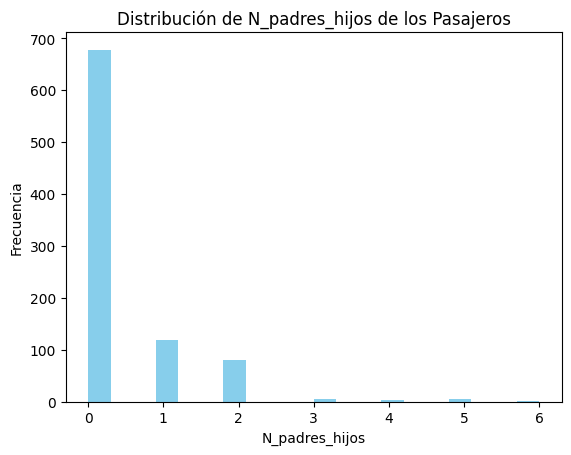

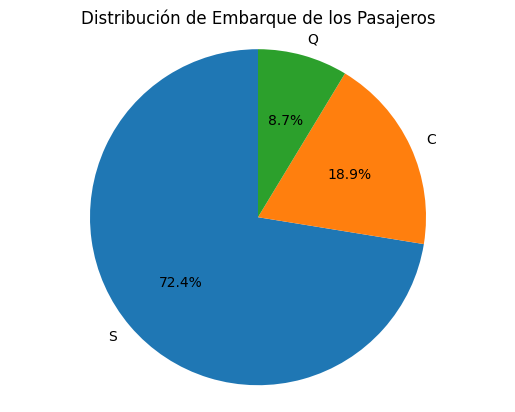

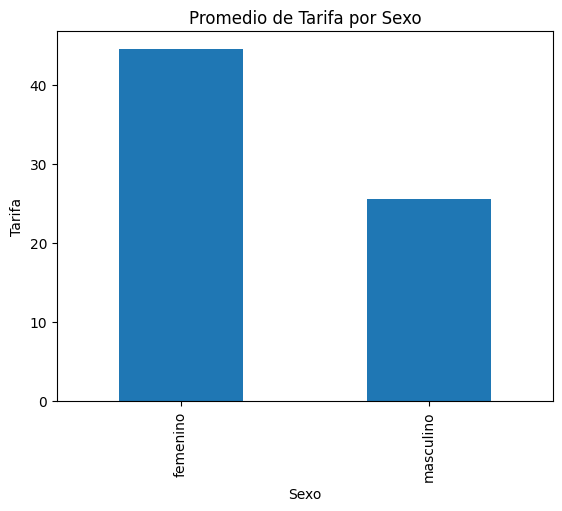

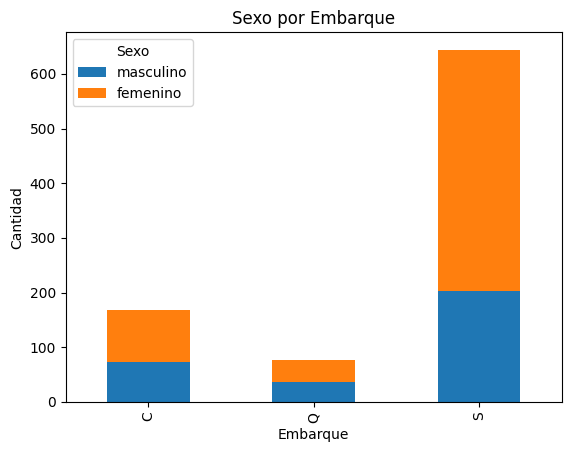

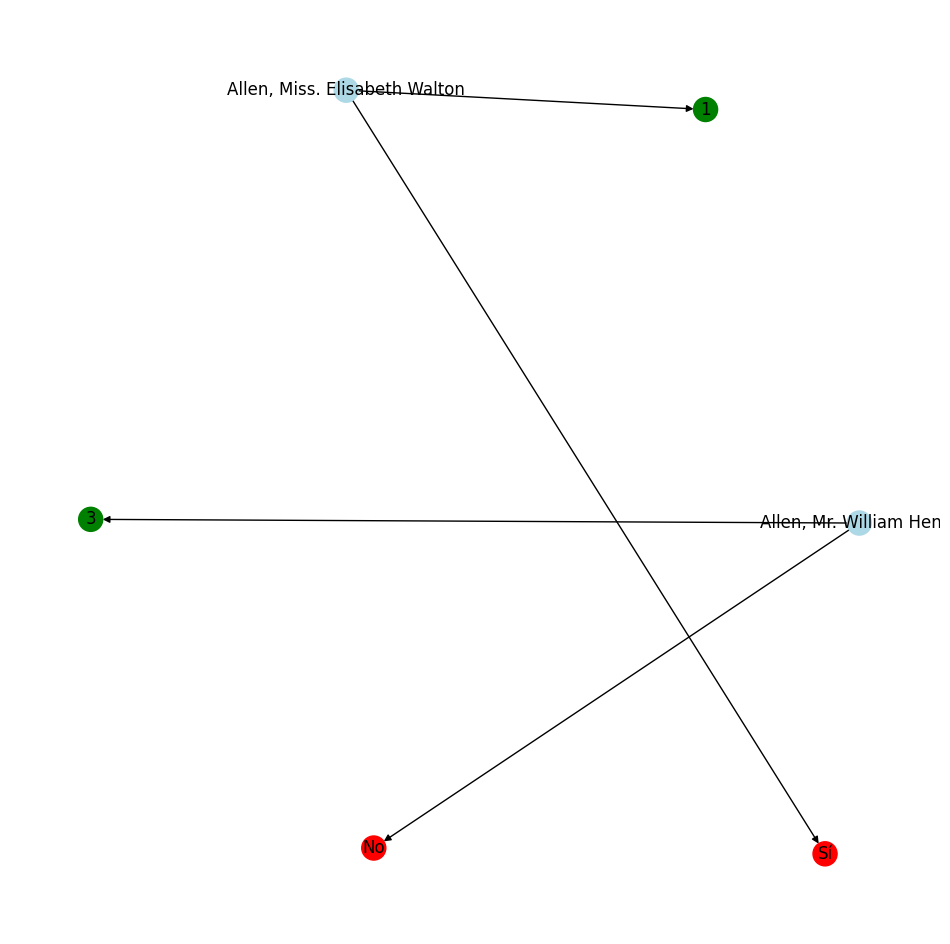

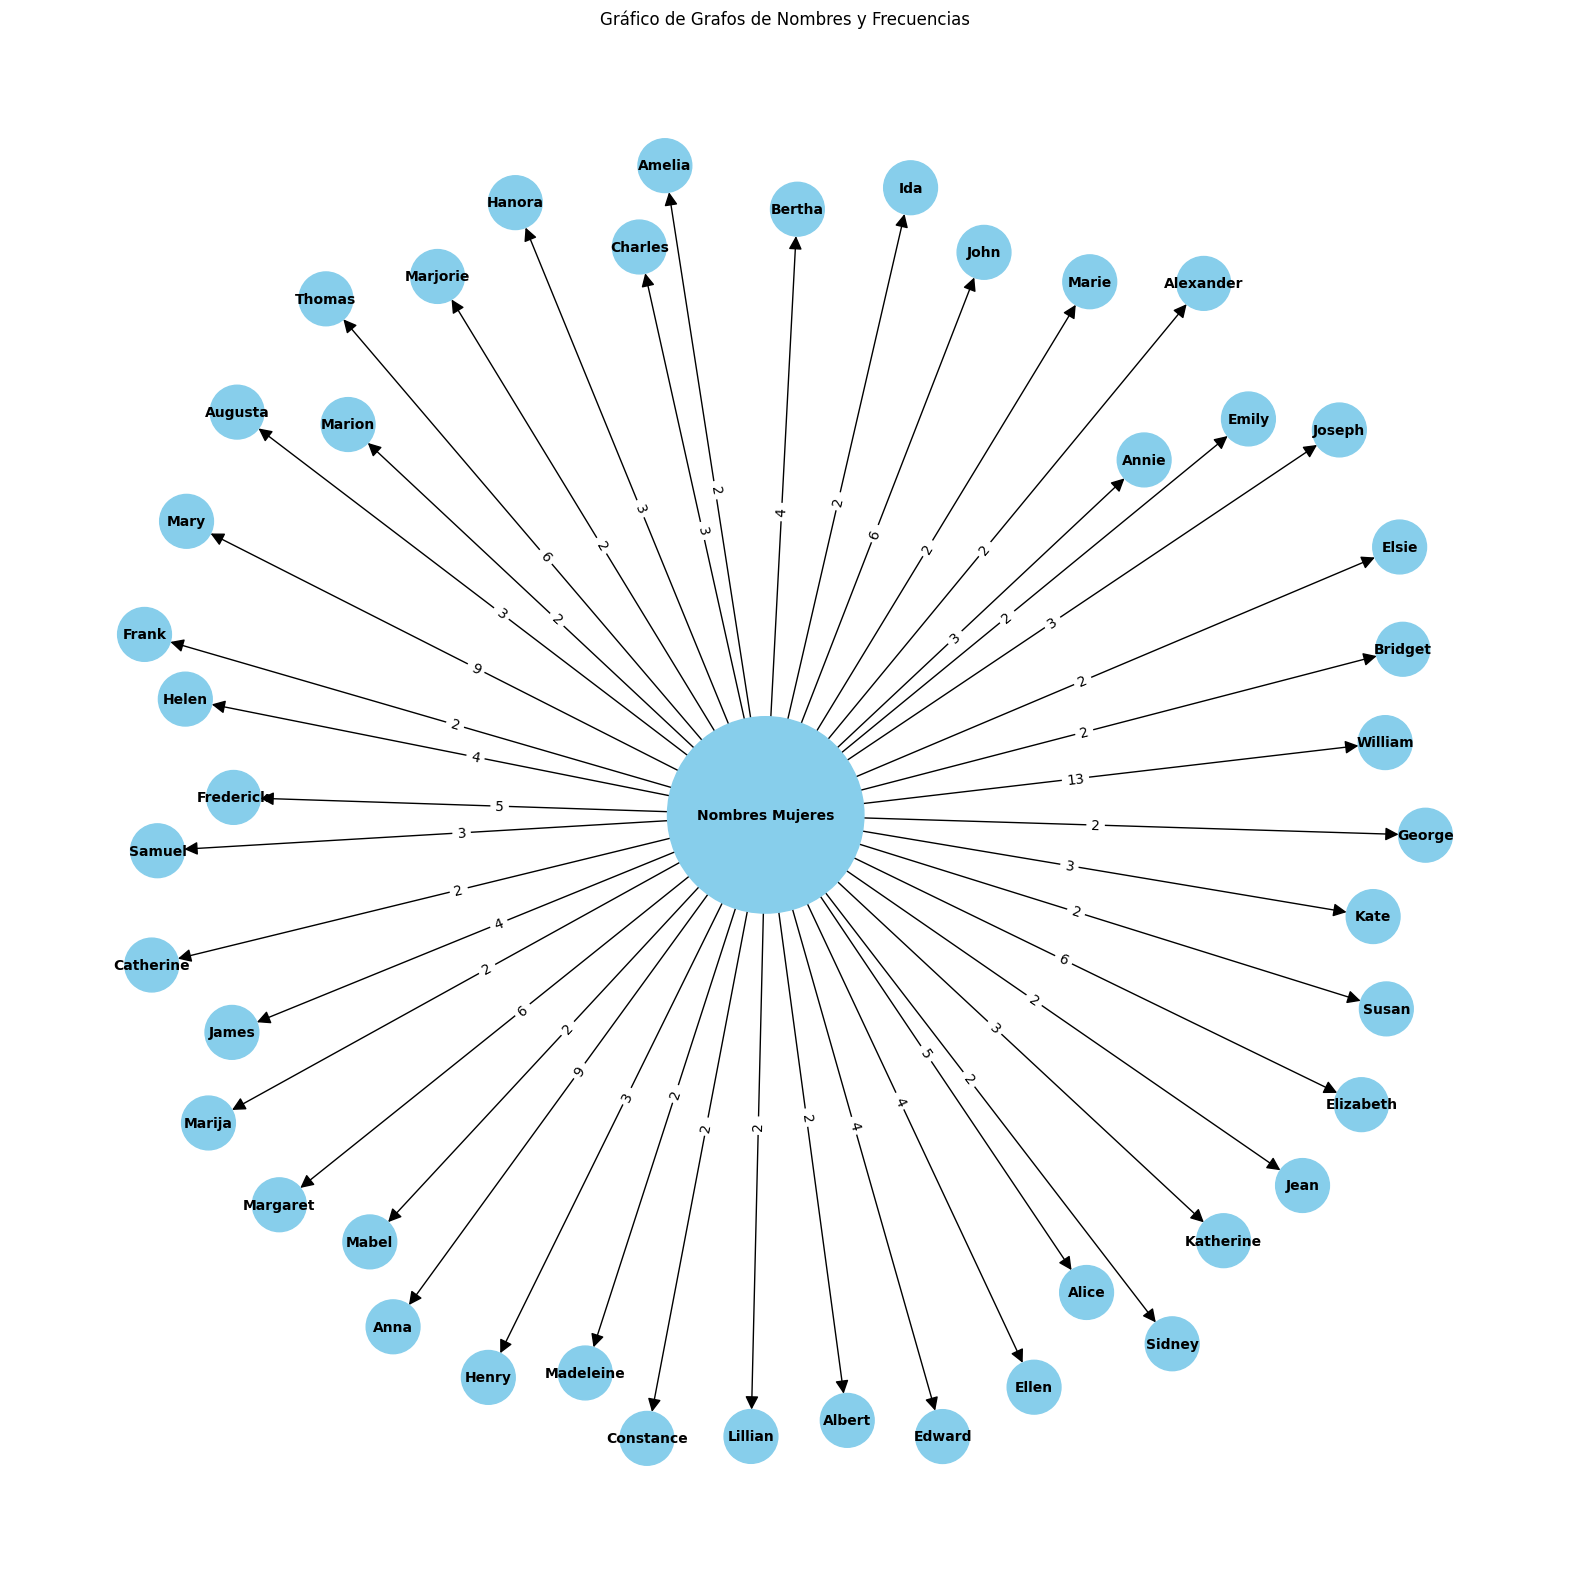


Usted ha salido del programa.


In [65]:
menu = Menu()
menu.mostrar_menu()